### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [13]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [14]:
df = pd.read_csv('data/training_data.csv')

In [15]:
categorical_features = ['company','director','released','star','year',
                        'writer','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','score','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [16]:
df['company']=df['company'].astype('category').cat.codes
#df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
#df['genre']=df['genre'].astype('category').cat.codes
#df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [17]:
corr_df=df[all_features].corr()

In [18]:
corr_df

,company,director,star,year,writer,budget,score,votes,popularity,budget_norm,score_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,-0.001501,0.019993,-0.025315,0.011311,0.096740,-0.011984,0.024338,0.055913,0.096740,-0.011984,0.024338,0.055913,0.024323,0.018072
director,-0.001501,1.000000,0.052224,-0.009636,0.127676,0.006079,0.079601,0.062968,0.032662,0.006079,0.079601,0.062968,0.032662,-0.018083,0.009016
star,0.019993,0.052224,1.000000,-0.008314,-0.000358,0.025592,0.043610,0.019215,0.000167,0.025592,0.043610,0.019215,0.000167,-0.018391,-0.013411
year,-0.025315,-0.009636,-0.008314,1.000000,-0.015802,0.227172,0.010205,0.288035,0.193262,0.227172,0.010205,0.288035,0.193262,-0.067056,-0.133524
writer,0.011311,0.127676,-0.000358,-0.015802,1.000000,-0.039460,0.039166,0.015047,-0.006825,-0.039460,0.039166,0.015047,-0.006825,0.000225,0.038506
budget,0.096740,0.006079,0.025592,0.227172,-0.039460,1.000000,-0.083126,0.378836,0.337549,1.000000,-0.083126,0.378836,0.337549,-0.069046,-0.141953
score,-0.011984,0.079601,0.043610,0.010205,0.039166,-0.083126,1.000000,0.438811,0.219958,-0.083126,1.000000,0.438811,0.219958,0.133883,0.143969
votes,0.024338,0.062968,0.019215,0.288035,0.015047,0.378836,0.438811,1.000000,0.506646,0.378836,0.438811,1.000000,0.506646,0.284163,0.266486
popularity,0.055913,0.032662,0.000167,0.193262,-0.006825,0.337549,0.219958,0.506646,1.000000,0.337549,0.219958,0.506646,1.000000,0.185167,0.180017
budget_norm,0.096740,0.006079,0.025592,0.227172,-0.039460,1.000000,-0.083126,0.378836,0.337549,1.000000,-0.083126,0.378836,0.337549,-0.069046,-0.141953


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

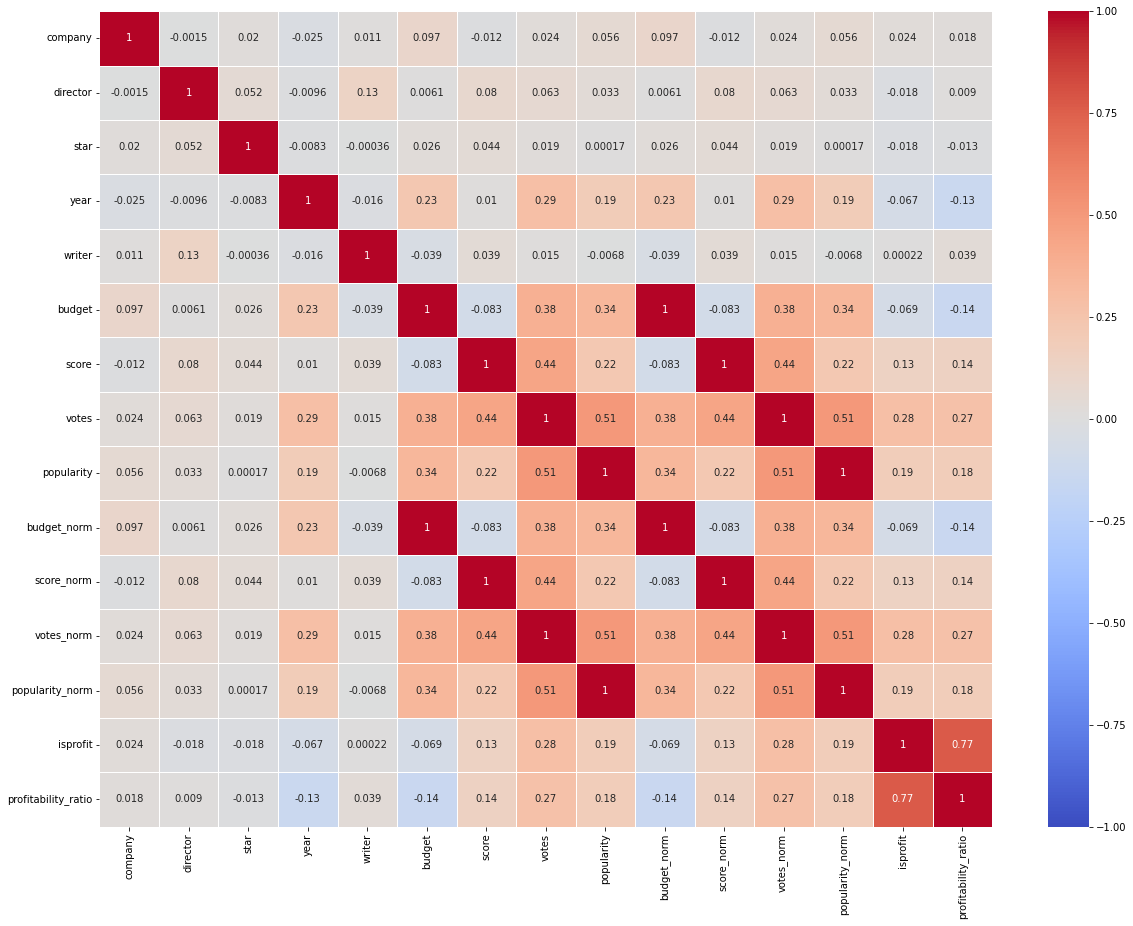

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [22]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,13]<-0.04 or corr_df.iloc[i,13]>0.04 or \
        corr_df.iloc[i,14]<-0.04 or corr_df.iloc[i,14]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [23]:
corr_df_features

{'budget',
 'budget_norm',
 'popularity',
 'popularity_norm',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'year'}

In [24]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')